# Sentiment Analysis in Python

## Introduction
This notebook is part of a tutorial that can be found on my YouTube channel [here](https://www.youtube.com). Please check it out!

In this notebook, we will be doing some sentiment analysis in Python using two different techniques:
1. **VADER (Valence Aware Dictionary and sEntiment Reasoner)** - Bag of words approach
2. **RoBERTa Pretrained Model from 🤗 Hugging Face Pipeline**

## 1. VADER Sentiment Analysis

### Installation
```python
!pip install vaderSentiment
```

### Example Usage
```python
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Analyze Sentiment
text = "I love this product! It's amazing."
sentiment = analyzer.polarity_scores(text)
print("Sentiment Scores:", sentiment)
```

## 2. RoBERTa Sentiment Analysis

### Installation
```python
!pip install transformers
```

### Example Usage
```python
from transformers import pipeline

# Initialize RoBERTa pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Analyze Sentiment
text = "I love this product! It's amazing."
result = sentiment_pipeline(text)
print("Sentiment Analysis Result:", result)
```

## Conclusion
We explored two powerful methods for sentiment analysis in Python. VADER provides quick and efficient sentiment scores, while RoBERTa offers deep contextual understanding. Choose the one that fits your needs!


## Read data and NLTK Basics

In [563]:
# Importations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use("ggplot")

In [564]:
# Reading data

df = pd.read_csv("Reviews.csv")
df.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...

In [565]:
df["Text"].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [566]:
df.shape

(568454, 10)

In [567]:
# Downscaling

import random
random.seed(42)
df = df.sample(500)
df1 = df.copy()

Text(0.5, 0, 'Score Count')

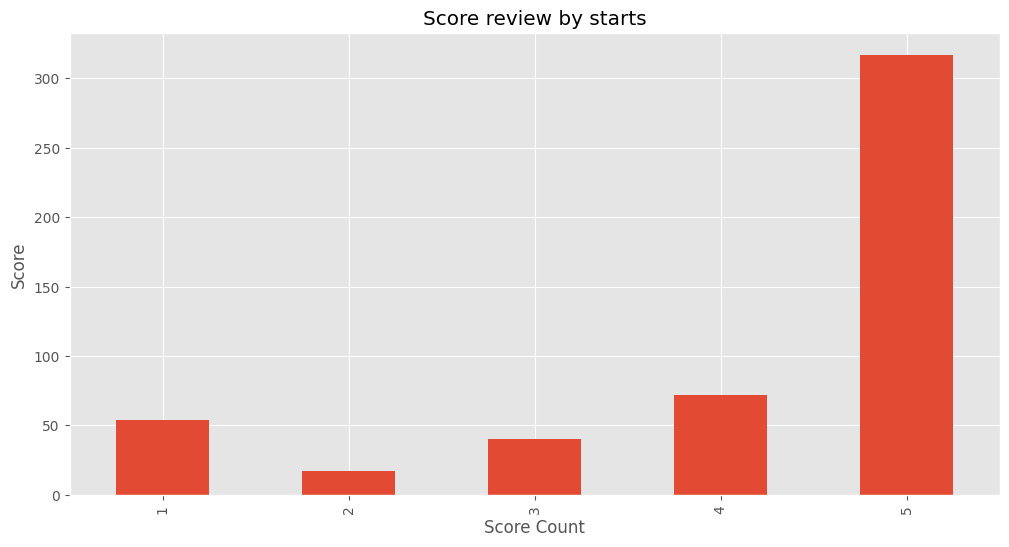

In [568]:
# Checking the value counts

ax = df["Score"].value_counts().sort_index().plot(kind = "bar", title = "Score review by starts", figsize = (12, 6))
ax.set_ylabel("Score")
ax.set_xlabel("Score Count")

## Basic NLTK

In [569]:
# Creating an example to work

example = df["Text"].values[0]
example

'This is a great product very excited to receive. Love the convenience of being able to carry.<br />A healthy way to receive sweetness'

In [570]:
# Tokenization

tokens = nltk.word_tokenize(example)
tokens[:10]

['This',
 'is',
 'a',
 'great',
 'product',
 'very',
 'excited',
 'to',
 'receive',
 '.']

In [571]:
# Checking the part of speech for our tokens

nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\nyasa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('product', 'NN'),
 ('very', 'RB'),
 ('excited', 'JJ'),
 ('to', 'TO'),
 ('receive', 'VB'),
 ('.', '.')]

In [572]:
# Creating entities

nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\nyasa\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\nyasa\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  This/DT
  is/VBZ
  a/DT
  great/JJ
  product/NN
  very/RB
  excited/JJ
  to/TO
  receive/VB
  ./.
  Love/VB
  the/DT
  convenience/NN
  of/IN
  being/VBG
  able/JJ
  to/TO
  carry./VB
  </NNP
  br/NN
  //NNP
  >/VBZ
  A/NNP
  healthy/JJ
  way/NN
  to/TO
  receive/VB
  sweetness/NN)


## Step 1. VADER Seniment Scoring¶

We will use NLTK's **SentimentIntensityAnalyzer** to get the neg/neu/pos scores of the text.

   1. This uses a "bag of words" approach:
   2. Stop words are removed
   3. each word is scored and combined to a total score.

**Note:** Sentiment Intensity Analyzer - Analyzes text and categorises whether positive negative or neutral

In [573]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.auto import tqdm

In [574]:
# Instantiation of out vader transformer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nyasa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [575]:
# Testing our analyzer

a=sia.polarity_scores("I am sorry for the inconvience")
b=sia.polarity_scores("I am so happy")
c = sia.polarity_scores("This is so bad oh my God")
a, b, c

({'neg': 0.245, 'neu': 0.755, 'pos': 0.0, 'compound': -0.0772},
 {'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115},
 {'neg': 0.387, 'neu': 0.431, 'pos': 0.181, 'compound': -0.5254})

In [576]:
# Sentiment analysis on our example

sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.502, 'pos': 0.498, 'compound': 0.9509}

In [577]:
# Checking the score for our example in the dataset

df["Score"].values[0]

5

In [578]:
# Running the polarity score across the whole dataset - we are going to get the compound(The average for every text)

df["polarity score"] = df["Text"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head(3)

Id   ProductId          UserId  ProfileName  HelpfulnessNumerator  \
553726  553727  B001E5E3NK  A15AG501BLEEZR        Tonie                     0   
8469      8470  B003VXFK44  A21FD7O2HHT2ZS      JackieD                     0   
458088  458089  B000CMF196  A3OVLPMZSU1BOL  Kate "Kate"                     2   

        HelpfulnessDenominator  Score        Time               Summary  \
553726                       0      5  1343001600  love the convenience   
8469                         0      5  1320883200        Awesome Flavor   
458088                       2      4  1261526400               Yumm-O!   

                                                     Text  polarity score  
553726  This is a great product very excited to receiv...          0.9509  
8469    My husband and I are obsessed with this coffee...          0.7772  
458088  I love the taste of this.  It's the only tea t...          0.8478

In [579]:
# Run the polarity score on the entire dataset

res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row["Text"]
    myId = row["Id"]
    res[myId] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [580]:
# Checking the first values of the dictionaries

list(res.items())[:4]

[(553727, {'neg': 0.0, 'neu': 0.502, 'pos': 0.498, 'compound': 0.9509}),
 (8470, {'neg': 0.09, 'neu': 0.665, 'pos': 0.244, 'compound': 0.7772}),
 (458089, {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.8478}),
 (164120, {'neg': 0.081, 'neu': 0.612, 'pos': 0.307, 'compound': 0.9349})]

In [581]:
# Creating a Dataframe out of the results

vader_sentiment_df = pd.DataFrame(res).T
vader_sentiment_df = vader_sentiment_df.reset_index().rename(columns  = {"index": "Id"})

In [582]:
df.head(3)

Id   ProductId          UserId  ProfileName  HelpfulnessNumerator  \
553726  553727  B001E5E3NK  A15AG501BLEEZR        Tonie                     0   
8469      8470  B003VXFK44  A21FD7O2HHT2ZS      JackieD                     0   
458088  458089  B000CMF196  A3OVLPMZSU1BOL  Kate "Kate"                     2   

        HelpfulnessDenominator  Score        Time               Summary  \
553726                       0      5  1343001600  love the convenience   
8469                         0      5  1320883200        Awesome Flavor   
458088                       2      4  1261526400               Yumm-O!   

                                                     Text  polarity score  
553726  This is a great product very excited to receiv...          0.9509  
8469    My husband and I are obsessed with this coffee...          0.7772  
458088  I love the taste of this.  It's the only tea t...          0.8478

In [583]:
# Merging the sentiments with the original dataframe - like sql

df = vader_sentiment_df.merge(df, on = ["Id"], how = "inner")
df.head(3)

Id   neg    neu    pos  compound   ProductId          UserId  \
0  553727  0.00  0.502  0.498    0.9509  B001E5E3NK  A15AG501BLEEZR   
1    8470  0.09  0.665  0.244    0.7772  B003VXFK44  A21FD7O2HHT2ZS   
2  458089  0.00  0.878  0.122    0.8478  B000CMF196  A3OVLPMZSU1BOL   

   ProfileName  HelpfulnessNumerator  HelpfulnessDenominator  Score  \
0        Tonie                     0                       0      5   
1      JackieD                     0                       0      5   
2  Kate "Kate"                     2                       2      4   

         Time               Summary  \
0  1343001600  love the convenience   
1  1320883200        Awesome Flavor   
2  1261526400               Yumm-O!   

                                                Text  polarity score  
0  This is a great product very excited to receiv...          0.9509  
1  My husband and I are obsessed with this coffee...          0.7772  
2  I love the taste of this.  It's the only tea t...          0.8478

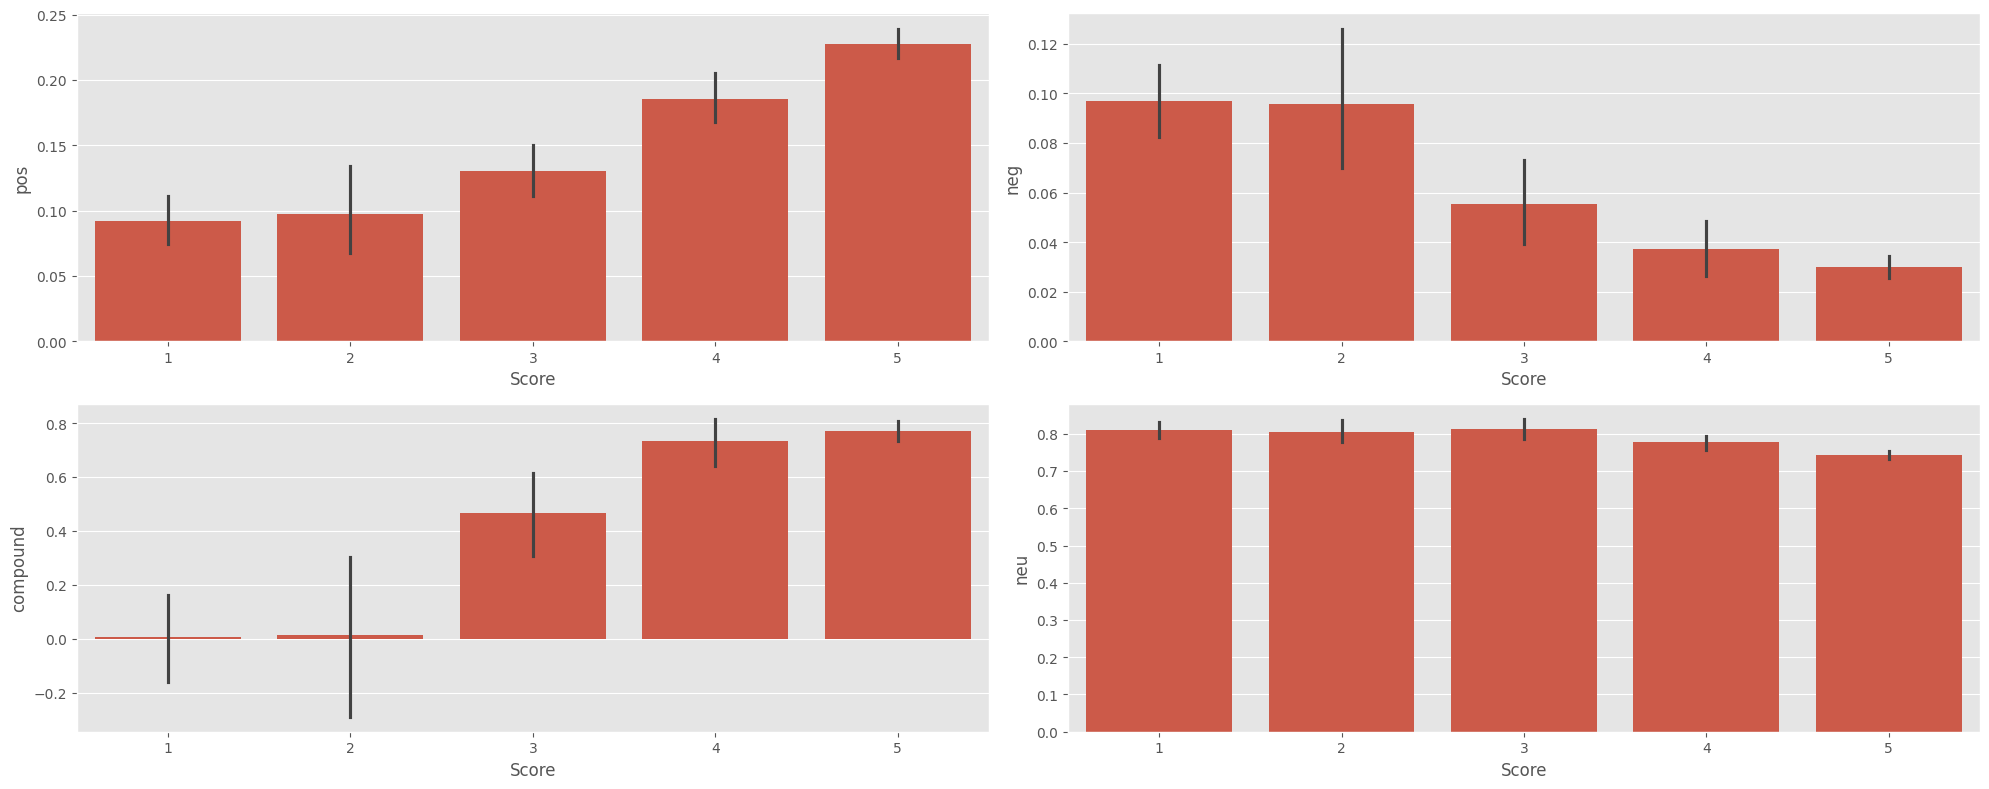

In [584]:

# Create the figure and axes objects
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

cols = ["pos", "neg", "compound", "neu"]
for i, col in enumerate(cols):
    sns.barplot(data=df, x="Score", y=col, ax=axes[i])
    axes[i].set_ylabel(col)
    axes[i].set_xlabel("Score")

plt.tight_layout()
plt.show()


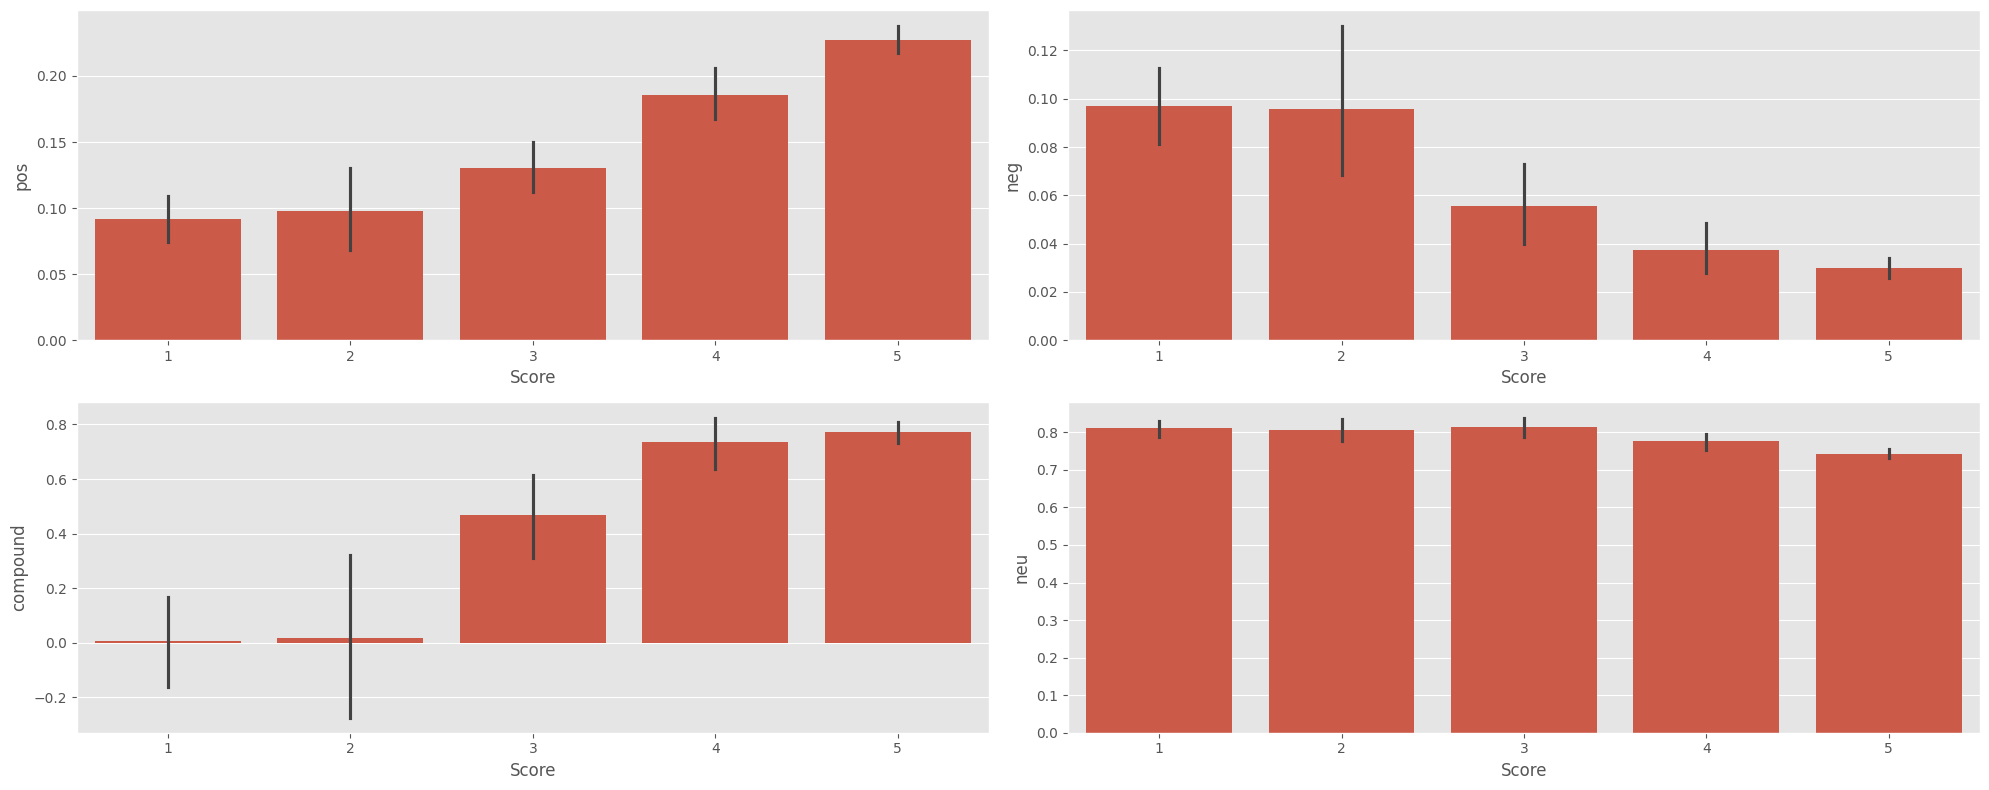

In [585]:

# Create the figure and axes objects
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

cols = ["pos", "neg", "compound", "neu"]
for i, col in enumerate(cols):
    sns.barplot(data=df, x="Score", y=col, ax=axes[i])
    axes[i].set_ylabel(col)
    axes[i].set_xlabel("Score")

plt.tight_layout()
plt.show()


## Step 3. Roberta Pretrained Model¶

Use a model trained of a large corpus of data.

Transformer model accounts for the words but also the context related to other words.

We are going to do transfer learning - This is pulling weights from a pretrained model 

If ur seeing this note that Sugar man at this time did not have the compute resources

I am basically a thief from other programmers--hahahahahaa

In [586]:
#  Importing model transformers

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [587]:
# Importing the specific model from hugging face

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [588]:
# Checking out our example - Vader results

from nltk.sentiment import SentimentIntensityAnalyzer

soa = SentimentIntensityAnalyzer()
example = df["Text"].values[0]
score = soa.polarity_scores(example)
score, example

({'neg': 0.0, 'neu': 0.502, 'pos': 0.498, 'compound': 0.9509},
 'This is a great product very excited to receive. Love the convenience of being able to carry.<br />A healthy way to receive sweetness')

## Applying the ROBERTA Model

In [589]:
# Using the Roberta Model

# Tokenizing the text - return pytorch tensors
encoded_text = tokenizer(example, return_tensors = "pt")
encoded_text

{'input_ids': tensor([[    0,   713,    16,    10,   372,  1152,   182,  2283,     7,  1325,
             4,  3437,     5,  9742,     9,   145,   441,     7,  2324, 49069,
          3809, 48709,   250,  2245,   169,     7,  1325, 35362,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1]])}

In [590]:
# Running model on encoded text - returns a tensor containing our output

output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.4956, -0.8964,  4.2478]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [591]:
# Extracting the logits

logits = output[0][0].detach().numpy()

In [592]:
# Extracting the output - passing logits to softmax function

scores = softmax(logits)
scores

array([0.00117046, 0.00579268, 0.9930368 ], dtype=float32)

In [593]:
# Creating a scores dictionary for storing the data

score_output = {
    "neg": [scores[0]],
    "neu": [scores[1]],
    "pos": [scores[2]]
}
score_output

{'neg': [0.0011704577], 'neu': [0.005792678], 'pos': [0.9930368]}

In [594]:
# The values for the vader's keys are scalars --> Converting them to lists

for key, value in score.items():
    if isinstance(value, (list, tuple)):
        score[key] = list(value)
    else:
        score[key] = [value]        

In [595]:
d1 = pd.DataFrame(score_output).T.rename(columns = {0: "roberta"})
d2 = pd.DataFrame(score).T.rename(columns = {0: "vader"})
scores = pd.concat([d1, d2], axis = 1)
scores

roberta   vader
neg       0.001170  0.0000
neu       0.005793  0.5020
pos       0.993037  0.4980
compound       NaN  0.9509

## Running Roberta against the Whole Dataset

In [596]:
# Defining the function for roberta polarity scores

def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors="pt")
    neg, neu, pos = model(**encoded_text)[0][0].detach().numpy()
    score_dict = {
        "roberta_neg": neg,
        "roberta_neu": neu,
        "roberta_pos": pos
    }
    return score_dict    

In [597]:
# Run the polarity score on the entire dataset

res = {}
vaderResult_renamed = {}
for i, row in tqdm(df1.iterrows(), total = len(df1)):
    try:
        text = row["Text"]
        myId = row["Id"]
        vaderResult = sia.polarity_scores(text)
        for key, value in vaderResult.items():
            vaderResult_renamed[f"Vader_{key}"] = value
        robertaResult = polarity_scores_roberta(text)
        both = {**robertaResult, **vaderResult_renamed}
        res[myId] = both
    except RuntimeError:
        print(f"Failed at {myId}")


  0%|          | 0/500 [00:00<?, ?it/s]

Failed at 133338
Failed at 402272
Failed at 455616
Failed at 516193
Failed at 523237
Failed at 437094


In [606]:
results = pd.DataFrame(res).T
results_df = results.reset_index().rename(columns = {"index": "Id"})
results_df.head(3)

Id  roberta_neg  roberta_neu  roberta_pos  Vader_neg  Vader_neu  \
0  553727    -2.495567    -0.896367     4.247806       0.00      0.502   
1    8470    -2.672989    -0.593636     3.957642       0.09      0.665   
2  458089    -1.575402    -0.385698     2.568124       0.00      0.878   

   Vader_pos  Vader_compound  
0      0.498          0.9509  
1      0.244          0.7772  
2      0.122          0.8478

In [611]:
# Outer left join with the original dataframe

df1 = results_df.merge(df1, how = "left")
df1.head(3)

Id  roberta_neg  roberta_neu  roberta_pos  Vader_neg  Vader_neu  \
0  553727    -2.495567    -0.896367     4.247806       0.00      0.502   
1    8470    -2.672989    -0.593636     3.957642       0.09      0.665   
2  458089    -1.575402    -0.385698     2.568124       0.00      0.878   

   Vader_pos  Vader_compound   ProductId          UserId  ProfileName  \
0      0.498          0.9509  B001E5E3NK  A15AG501BLEEZR        Tonie   
1      0.244          0.7772  B003VXFK44  A21FD7O2HHT2ZS      JackieD   
2      0.122          0.8478  B000CMF196  A3OVLPMZSU1BOL  Kate "Kate"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      5  1343001600   
1                     0                       0      5  1320883200   
2                     2                       2      4  1261526400   

                Summary                                               Text  
0  love the convenience  This is a great product very excited to receiv...  
1        Awesome Flavor  My husband and I are obsessed with this coffee...  
2               Yumm-O!  I love the taste of this.  It's the only tea t...

## Model Comparison

In [612]:
df1.columns

Index(['Id', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'Vader_neg',
       'Vader_neu', 'Vader_pos', 'Vader_compound', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

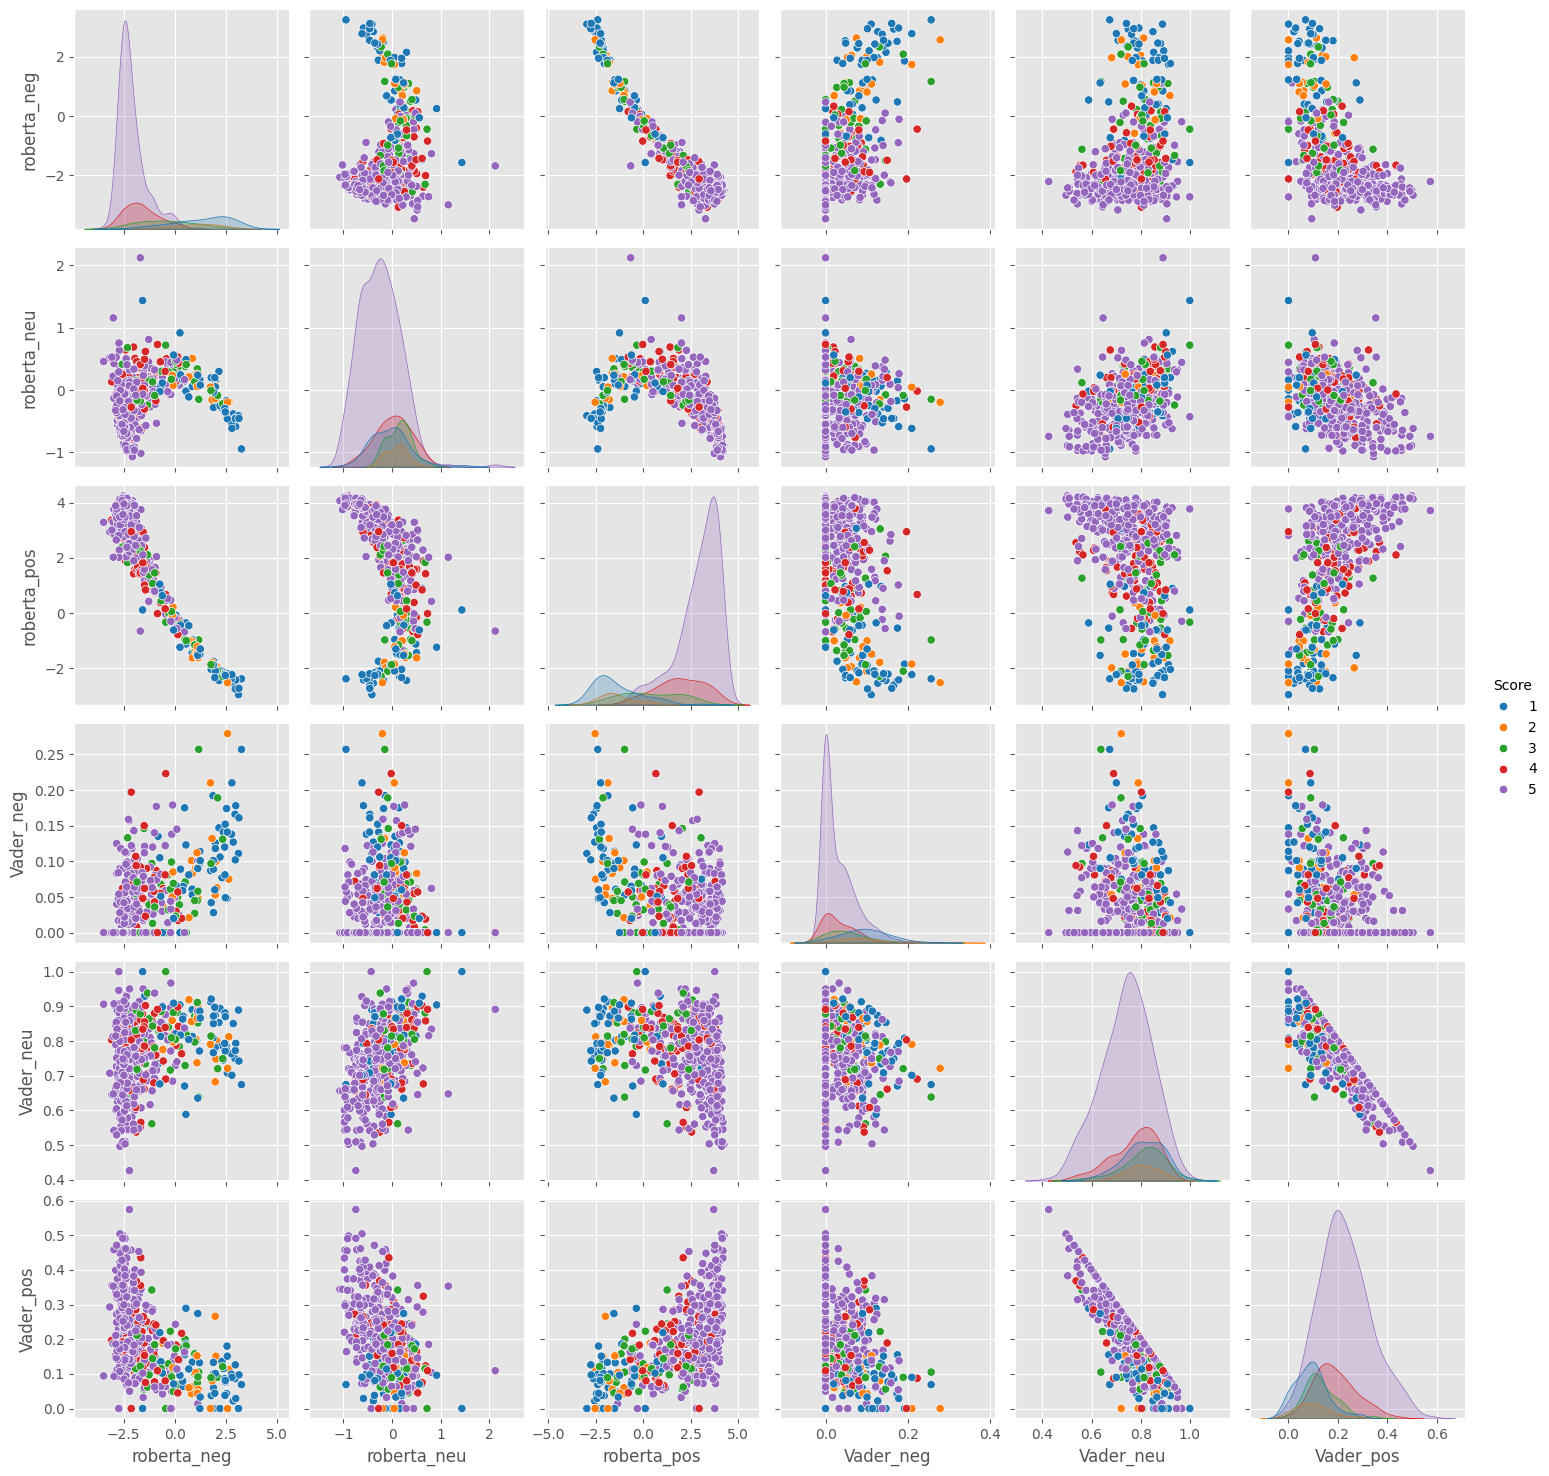

In [613]:
sns.pairplot(
    data = df1,
    vars = ["roberta_neg", "roberta_neu", "roberta_pos", "Vader_neg", "Vader_neu", "Vader_pos"],
    hue = "Score",
    palette = "tab10"
)
plt.show()

## Review Examples

In [626]:
df1.query("Score == 1").sort_values(by = "roberta_neu", ascending = False)[["Text", "roberta_neu", "Score"]].values[0]

array(['They sent me a variety pack that included a few cinnamon roll flavors, instead of the advertised 24 pack of ALL cinnamon rolls.',
       1.4357231855392456, 1], dtype=object)

In [627]:
df1.query("Score == 1").sort_values(by = "Vader_neu", ascending = False)[["Text", "Vader_neu", "Score"]].values[0]

array(['They sent me a variety pack that included a few cinnamon roll flavors, instead of the advertised 24 pack of ALL cinnamon rolls.',
       1.0, 1], dtype=object)

In [628]:
df1.query("Score == 5").sort_values(by = "roberta_neu", ascending = False)[["Text", "roberta_neu", "Score"]].values[0]

array(['General Foods International French Vanilla Cafe Coffee Drink Mix, 27 Ounce Container - I purchased this today at Smart & Final for $8.39 ($0.31 per ounce)',
       2.122514009475708, 5], dtype=object)

In [629]:
df1.query("Score == 5").sort_values(by = "Vader_neu", ascending = False)[["Text", "Vader_neu", "Score"]].values[0]

array(['The kaffir lime leaves arrived very promptly and had been kept cool.<br /><br />They appear to be quite fresh.<br /><br />Have cooked with them, it was wonderful.<br /><br />Thanks',
       1.0, 5], dtype=object)

## Third Approach: The transformer Pipeline

Quick and easy way to run sentiment predictions

In [635]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 5.0 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 5.0 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 5.0 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 5.0 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 5.0 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 5.0 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 5.0 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 5.0 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 5.0 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 524.3 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 524.3 kB/s eta 0:00:01
   -------------------

In [636]:
# Using the default sentiment model --> Note all this is customizable

from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [637]:
sentiment_pipeline("I love programming")

[{'label': 'POSITIVE', 'score': 0.9998173117637634}]

In [639]:
sentiment_pipeline("Boo")

[{'label': 'NEGATIVE', 'score': 0.9715901017189026}]